In [449]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

* 데이터 출처
* [Pima Indians Diabetes Database | Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

In [450]:
df = pd.read_csv("http://bit.ly/data-diabetes-csv")
df.shape

(768, 9)

In [451]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# EDA

In [452]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 기술 통계로 알 수 있는 점

* 최솟값이 0인 애들이 많음
* 1사분위 수가 0인 애들도 있음
* 인슐린 표준편차가 굉장히 크다
* 인슐린 최댓값이 846 (정상 체중을 가진 사람에서 공복 인슐린 농도는 약 5~15)

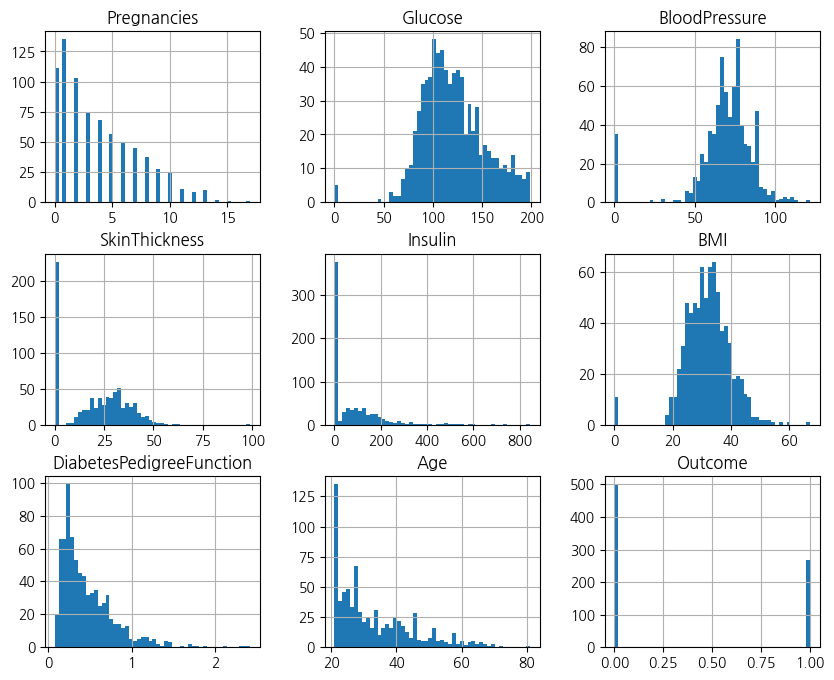

In [453]:
df.hist(figsize=(10, 8), bins=50);

## 특이점
* 당수치, 혈압, 인슐린, bmi가 0인 사람

Text(0.5, 1.0, '임신 횟수별 당뇨병 발병 빈도')

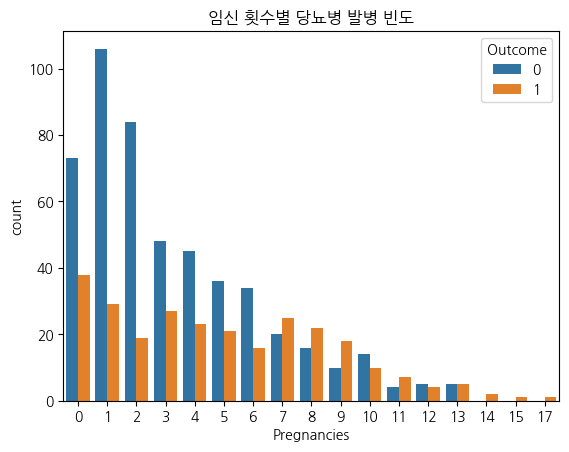

In [454]:
sns.countplot(data=df, x="Pregnancies", hue='Outcome')
plt.title("임신 횟수별 당뇨병 발병 빈도")

Text(0.5, 1.0, '연령대 별 혈압')

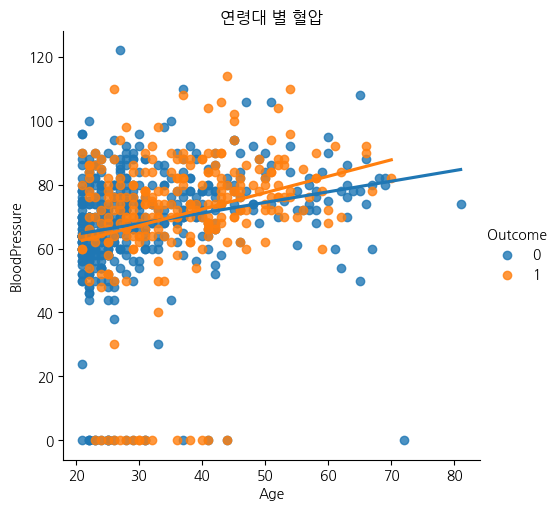

In [455]:
sns.lmplot(data=df, x="Age", y="BloodPressure",hue="Outcome", ci=False)
plt.title("연령대 별 혈압")

# Feature Engineering
* 머신러닝 알고리즘에게 힌트 제공
* 결정 트리의 오버피팅 방지
    * 조건들이 잘게 나누어지는 것을 방지

## 수치형 변수를 범주형 변수로

<AxesSubplot:xlabel='Pregnancies_high', ylabel='count'>

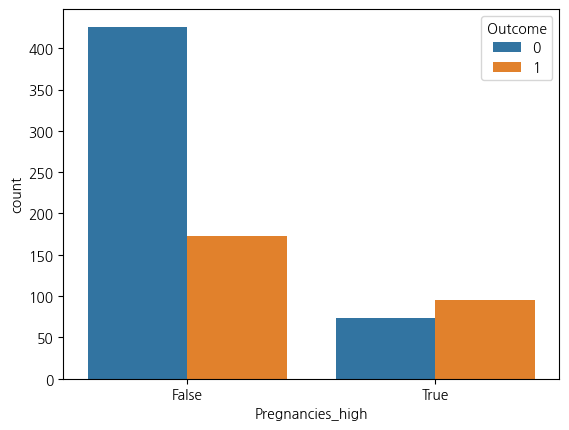

In [456]:
# 임신횟수가 6보다 큰 값 파생변수 생성
df["Pregnancies_high"] = df["Pregnancies"] > 6
sns.countplot(data=df, x="Pregnancies_high", hue="Outcome")

## 결측치

In [457]:
# Insulin이 0인 값을 결측치 NaN으로 채운 새로운 파생변수
df["Insulin_nan"] = df["Insulin"].replace(0, np.nan)

In [458]:
# 결측치 수
df["Insulin_nan"].isnull().sum()

374

In [459]:
# 결측치 비율
df["Insulin_nan"].isnull().mean()

0.4869791666666667

In [460]:
# 0을 결측치로 채우기 전 기술통계
df.groupby("Outcome")["Insulin"].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,500.0,68.792000,98.865289,0.0,0.0,39.0,105.00,744.0
1,268.0,100.335821,138.689125,0.0,0.0,0.0,167.25,846.0


In [461]:
# 0을 결측치로 채운 후 기술통계
df.groupby("Outcome")["Insulin_nan"].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,264.0,130.287879,102.482237,15.0,66.0,102.5,161.25,744.0
1,130.0,206.846154,132.699898,14.0,127.5,169.5,239.25,846.0


In [462]:
# 당뇨병 결과 별 인슐린의 평균
Insulin_mean = df.groupby("Outcome")["Insulin_nan"].mean()
Insulin_mean

Outcome
0    130.287879
1    206.846154
Name: Insulin_nan, dtype: float64

In [463]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Insulin_nan
0,6,148,72,35,0,33.6,0.627,50,1,False,NaN
1,1,85,66,29,0,26.6,0.351,31,0,False,NaN
2,8,183,64,0,0,23.3,0.672,32,1,True,NaN
3,1,89,66,23,94,28.1,0.167,21,0,False,94.0
4,0,137,40,35,168,43.1,2.288,33,1,False,168.0
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,True,180.0
764,2,122,70,27,0,36.8,0.340,27,0,False,NaN
765,5,121,72,23,112,26.2,0.245,30,0,False,112.0
766,1,126,60,0,0,30.1,0.349,47,1,False,NaN


In [464]:
# 결측치를 평균으로 채우기
df["Insulin_fill"] = df["Insulin_nan"]
df.loc[(df["Outcome"] == 0)&(df["Insulin_nan"].isnull()), "Insulin_fill"] = Insulin_mean[0]
df.loc[(df["Outcome"] == 1)&(df["Insulin_nan"].isnull()), "Insulin_fill"] = Insulin_mean[1]
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Insulin_nan,Insulin_fill
0,6,148,72,35,0,33.6,0.627,50,1,False,NaN,206.846154
1,1,85,66,29,0,26.6,0.351,31,0,False,NaN,130.287879
2,8,183,64,0,0,23.3,0.672,32,1,True,NaN,206.846154
3,1,89,66,23,94,28.1,0.167,21,0,False,94.0,94.000000
4,0,137,40,35,168,43.1,2.288,33,1,False,168.0,168.000000


## 이상치

<AxesSubplot:xlabel='Insulin_nan'>

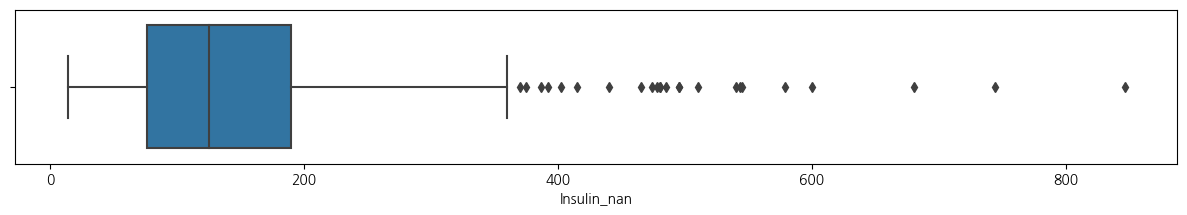

In [465]:
plt.figure(figsize=(15, 2))
sns.boxplot(data=df, x="Insulin_nan")

In [466]:
df["Insulin_fill"].describe()

count    768.000000
mean     157.003527
std       88.860914
min       14.000000
25%      121.500000
50%      130.287879
75%      206.846154
max      846.000000
Name: Insulin_fill, dtype: float64

In [467]:
df = df[df["Insulin_fill"] < 700]
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Insulin_nan,Insulin_fill
0,6,148,72,35,0,33.6,0.627,50,1,False,NaN,206.846154
1,1,85,66,29,0,26.6,0.351,31,0,False,NaN,130.287879
2,8,183,64,0,0,23.3,0.672,32,1,True,NaN,206.846154
3,1,89,66,23,94,28.1,0.167,21,0,False,94.0,94.000000
4,0,137,40,35,168,43.1,2.288,33,1,False,168.0,168.000000


## 종현님의 IQR 이상치 제거 

In [468]:
# 종현님의 이상치 제거
IQR = df["Insulin_nan"].quantile(0.75) - df["Insulin_nan"].quantile(0.25)
outliers = df[df["Insulin_nan"] > df["Insulin_nan"].quantile(0.75) + 1.5 * IQR]

In [469]:
df = df.drop(outliers.index)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Insulin_nan,Insulin_fill
0,6,148,72,35,0,33.6,0.627,50,1,False,NaN,206.846154
1,1,85,66,29,0,26.6,0.351,31,0,False,NaN,130.287879
2,8,183,64,0,0,23.3,0.672,32,1,True,NaN,206.846154
3,1,89,66,23,94,28.1,0.167,21,0,False,94.0,94.000000
4,0,137,40,35,168,43.1,2.288,33,1,False,168.0,168.000000


## 조은님의이상치 제거

In [470]:
desc = df["Insulin_nan"].describe()
desc

count    370.000000
mean     132.610811
std       74.285393
min       14.000000
25%       75.000000
50%      120.000000
75%      177.500000
max      360.000000
Name: Insulin_nan, dtype: float64

In [471]:
IQR = desc["75%"] - desc["25%"]
max_out = desc["75%"] + (IQR * 1.5)
max_out

331.25

In [472]:
df = df[df["Insulin_fill"] < max_out]
df.shape

(741, 12)

# train : test = 8 : 2 분리

## 학습에 사용할 컬럼

In [473]:
feature_names = df.columns.tolist()
# label 제거
feature_names.remove("Outcome")
# Insulin_fill 이외 다른 Insulin 컬럼 제거
feature_names.remove("Insulin")
feature_names.remove("Insulin_nan")
feature_names.remove('Pregnancies')
feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high',
 'Insulin_fill']

In [474]:
label_name = "Outcome" 

In [475]:
split_count = int(df.shape[0] * 0.8)
split_count

592

## train set

In [476]:
train = df[:split_count]

train.shape

(592, 12)

In [477]:
X_train = train[feature_names]
X_train.shape

(592, 8)

In [478]:
y_train = train[label_name]
y_train.shape

(592,)

## test set

In [479]:
test = df[split_count:]
test.shape

(149, 12)

In [480]:
X_test = test[feature_names]
X_test.shape

(149, 8)

In [481]:
y_test = test[label_name]
y_test.shape

(149,)

# Decision Tree

## 결정 트리 모델

In [482]:
# from sklearn.tree import DecisionTreeClassifier

# model = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_leaf=6)
# model

## Random Forest

In [483]:
# n_jobs = 사용할 cpu 코어의 수
# -1 : 모든 코어를 사용, 사용 중인 코어를 모를 경우를 대비하기 위해 코어의 수를 -1로 지정
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=3000, n_jobs=-1, random_state=42, max_depth=4, min_samples_leaf=16)
model

RandomForestClassifier(max_depth=4, min_samples_leaf=16, n_estimators=3000,
                       n_jobs=-1, random_state=42)

In [484]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=16, n_estimators=3000,
                       n_jobs=-1, random_state=42)

In [485]:
y_predict = model.predict(X_test)
y_predict

array([1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0])

# 시각화

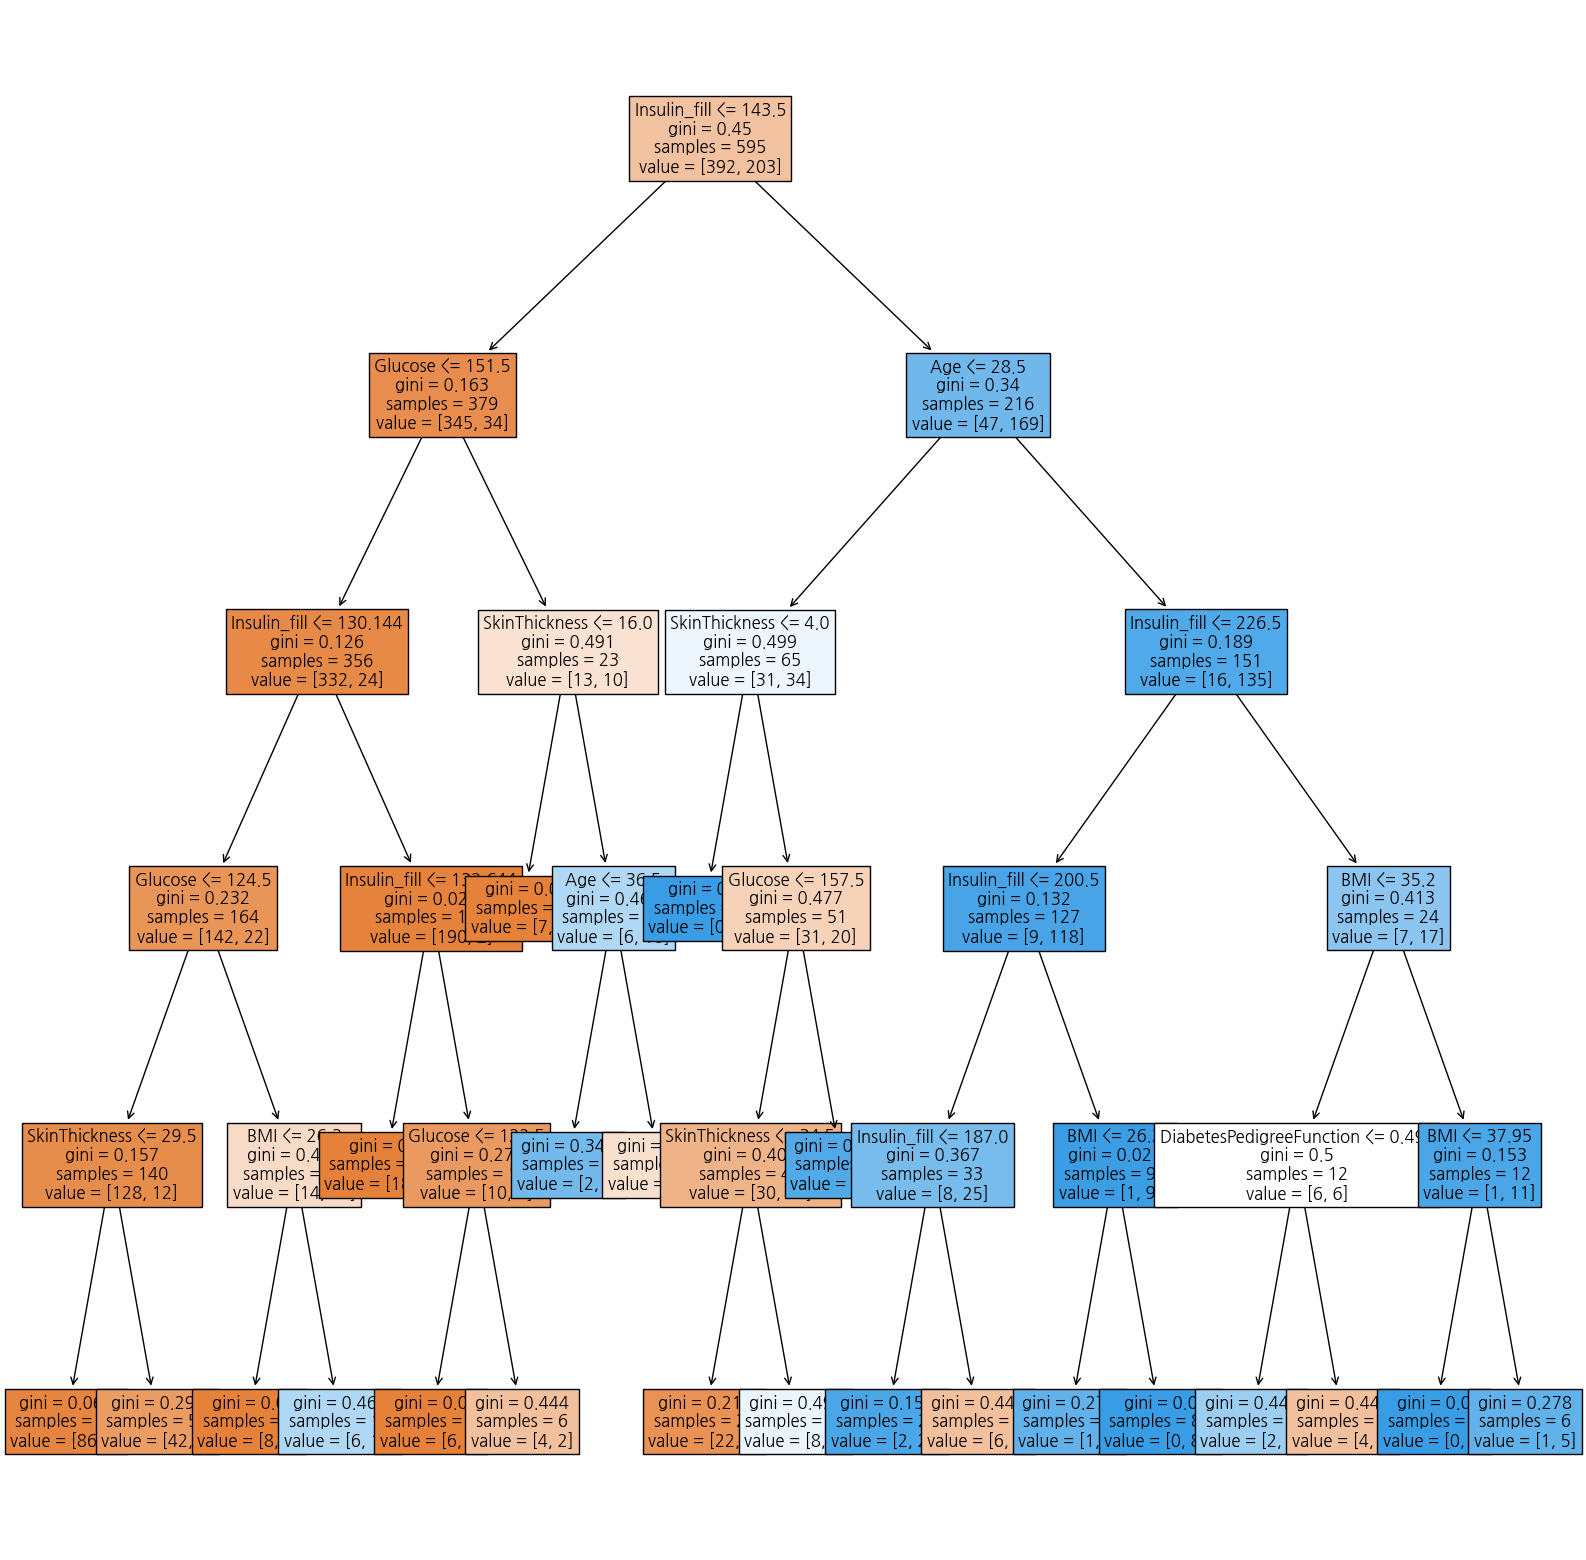

In [406]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
plot_tree(model, max_depth=6, feature_names=feature_names, filled=True, fontsize=12)
plt.show()

In [407]:
from sklearn.tree import export_text

print(export_text(model, feature_names=feature_names))

|--- Insulin_fill <= 143.50
|   |--- Glucose <= 151.50
|   |   |--- Insulin_fill <= 130.14
|   |   |   |--- Glucose <= 124.50
|   |   |   |   |--- SkinThickness <= 29.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- SkinThickness >  29.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- Glucose >  124.50
|   |   |   |   |--- BMI <= 26.30
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- BMI >  26.30
|   |   |   |   |   |--- class: 1
|   |   |--- Insulin_fill >  130.14
|   |   |   |--- Insulin_fill <= 132.64
|   |   |   |   |--- class: 0
|   |   |   |--- Insulin_fill >  132.64
|   |   |   |   |--- Glucose <= 122.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Glucose >  122.50
|   |   |   |   |   |--- class: 0
|   |--- Glucose >  151.50
|   |   |--- SkinThickness <= 16.00
|   |   |   |--- class: 0
|   |   |--- SkinThickness >  16.00
|   |   |   |--- Age <= 36.50
|   |   |   |   |--- class: 1
|   |   |   |--- Age >  36.50
|   |   |   |   |--- class: 0
|--- Insul

# 모델 평가

## feature importance

In [486]:
fi = pd.Series(model.feature_importances_)
fi.index = feature_names
fi = fi.sort_values()
fi

BloodPressure               0.015456
Pregnancies_high            0.020623
SkinThickness               0.032644
DiabetesPedigreeFunction    0.044088
Age                         0.082608
BMI                         0.106699
Glucose                     0.204122
Insulin_fill                0.493761
dtype: float64

<AxesSubplot:>

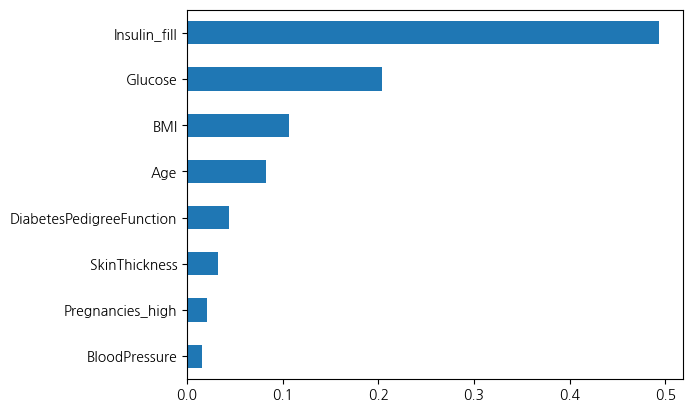

In [487]:
fi.plot(kind="barh")

<AxesSubplot:>

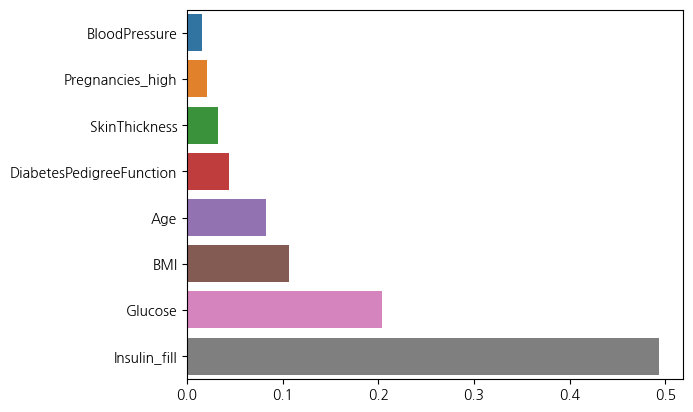

In [488]:
sns.barplot(x=fi, y=fi.index)

<AxesSubplot:>

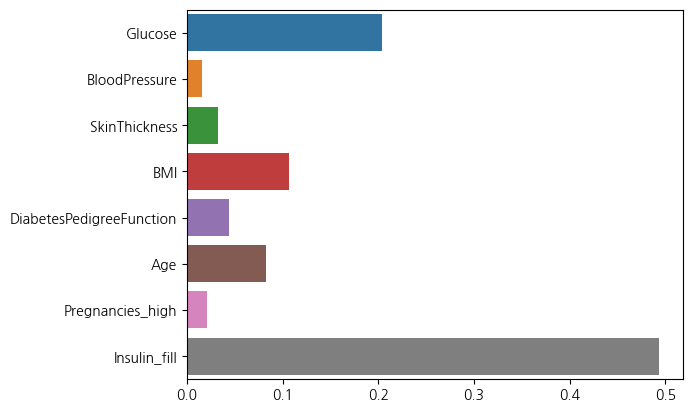

In [489]:
sns.barplot(x=model.feature_importances_,  y=model.feature_names_in_)

## 정확도

In [490]:
model.score(X_test, y_test)

0.8657718120805369

In [491]:
test["accuracy"] = y_test == y_predict

/var/folders/ql/gbsdt1191mbf_hk8mhnwwpd80000gn/T/ipykernel_3409/2173196817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["accuracy"] = y_test == y_predict


In [ ]:
# 예측 틀린 값만 찾기
test[test["accuracy"] == False]

## 하이퍼 파라미터 그리드 서치

In [354]:
from sklearn.model_selection import GridSearchCV

In [436]:
model = DecisionTreeClassifier()

In [437]:
hyper_parameter = {
    "max_depth": [i for i in range(1, 21)], 
#     "max_features": [i for i in range(1, 11)],
    "min_samples_leaf": [i for i in range(1, 21)]
#     "max_leaf_nodes": [i for i in range(10, 16)]
#     "min_samples_split": [i for i in range(1, 11)]
}

In [438]:
X = df[feature_names]
y = df["Outcome"]

In [439]:
hyper_parameter_tuner = GridSearchCV(model, hyper_parameter)

In [440]:
hyper_parameter_tuner.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20]})

In [441]:
hyper_parameter_tuner.best_params_

{'max_depth': 4, 'min_samples_leaf': 16}